## Preprocessing

In [119]:
import pandas as pd
df = pd.read_csv('heart_data.csv')

print(df.head())

  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1       

## CHECKING FOR NULL VALUES

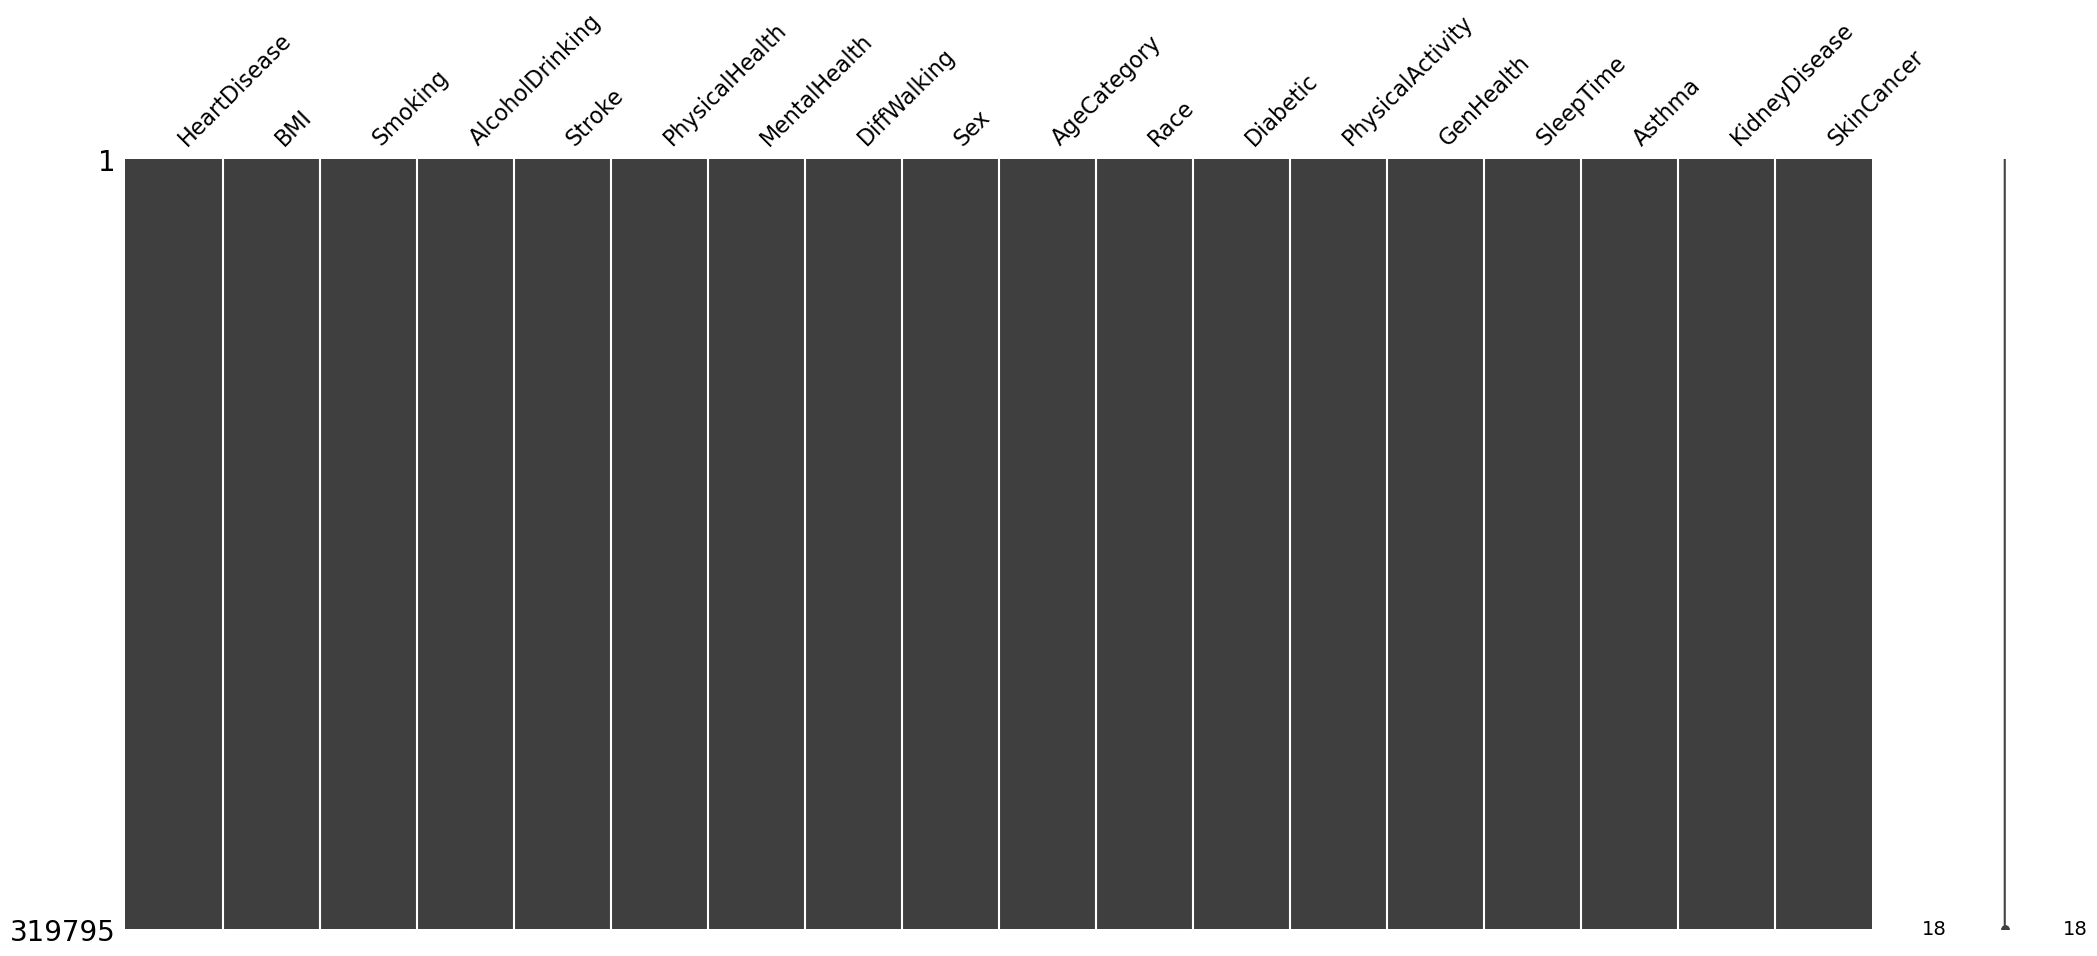

<Figure size 1500x900 with 0 Axes>

In [120]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df)
plt.figure(figsize=(15, 9 ))
plt.show()


C:\Users\deane\AppData\Local\Temp\ipykernel_14516\1273517605.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='HeartDisease', palette=custom_palette, order = ['No', 'Yes'])


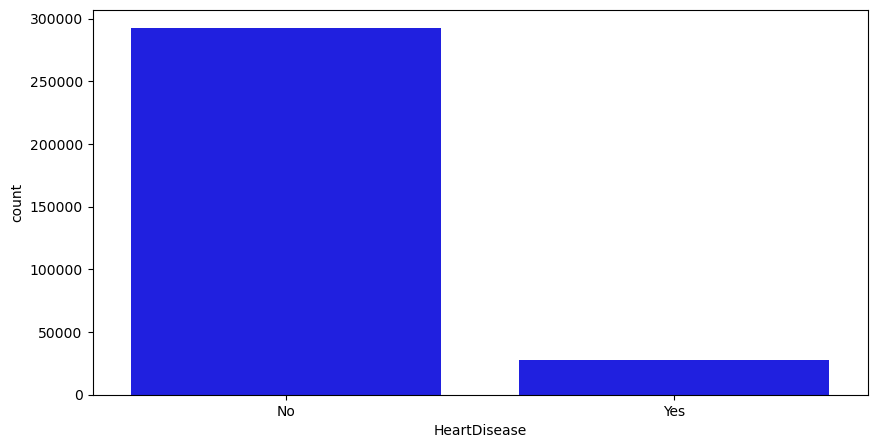

In [121]:
import seaborn as sns
plt.figure(figsize=(10,5))
custom_palette = ["#0000ff", "#0000ff"]  
sns.countplot(data=df, x='HeartDisease', palette=custom_palette, order = ['No', 'Yes'])
plt.show()


In [122]:
# Calculate the number of rows to delete
num_rows_to_delete = int(0.92 * len(df[df['HeartDisease'] == 'No']))

# Get indices of rows where HeartDisease is "No"
indices_to_delete = df[df['HeartDisease'] == 'No'].sample(n=num_rows_to_delete).index

# Drop rows by indices
df.drop(indices_to_delete, inplace=True)

C:\Users\deane\AppData\Local\Temp\ipykernel_14516\3497551675.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='HeartDisease', palette=custom_palette, order = ['No', 'Yes'])


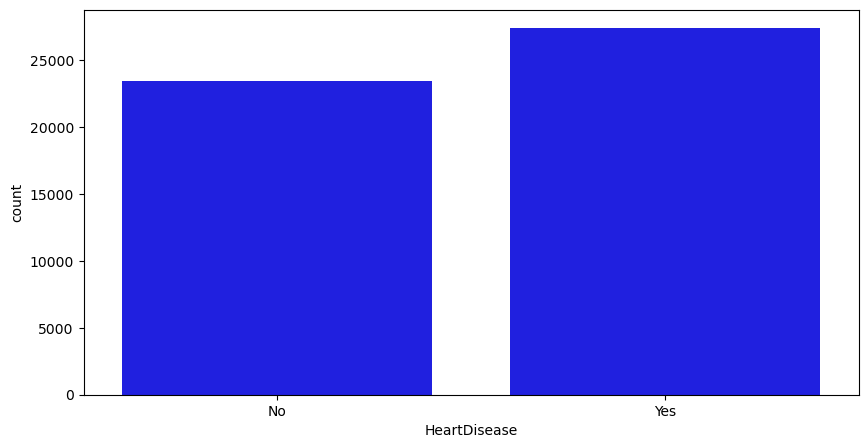

In [123]:
plt.figure(figsize=(10,5))
custom_palette = ["#0000ff", "#0000ff"]  
sns.countplot(data=df, x='HeartDisease', palette=custom_palette, order = ['No', 'Yes'])
plt.show()

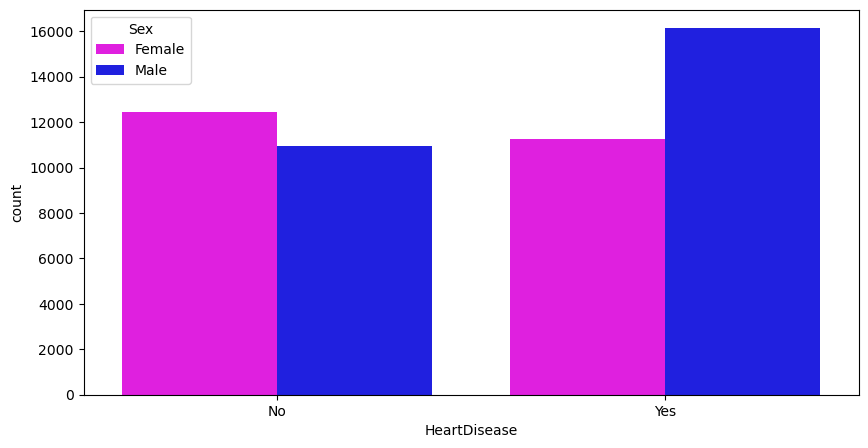

In [124]:
import seaborn as sns

plt.figure(figsize=(10,5))
custom_palette = ["#ff00ff", "#0000ff"]  
sns.countplot(data=df, x='HeartDisease', palette=custom_palette, hue='Sex', order = ['No', 'Yes'])
plt.show()

In [125]:
from sklearn.calibration import LabelEncoder


label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
categorical_columns = ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

df.head()    
# corr_matrix = df.corr()
# plt.figure(figsize=(15,10))
# sns.heatmap(corr_matrix, annot=True, cmap='Blues')
# plt.show()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,1,28.87,1,0,0,6.0,0.0,1,0,11,2,0,0,1,12.0,0,0,0
10,1,34.30,1,0,0,30.0,0.0,1,1,8,5,2,0,3,15.0,1,0,0
35,1,32.98,1,0,1,10.0,0.0,1,1,11,5,2,1,3,4.0,0,0,1
42,1,25.06,0,0,0,0.0,0.0,1,0,12,5,2,0,2,7.0,0,0,1
43,1,30.23,1,0,0,6.0,2.0,1,0,11,5,2,1,1,8.0,0,1,0


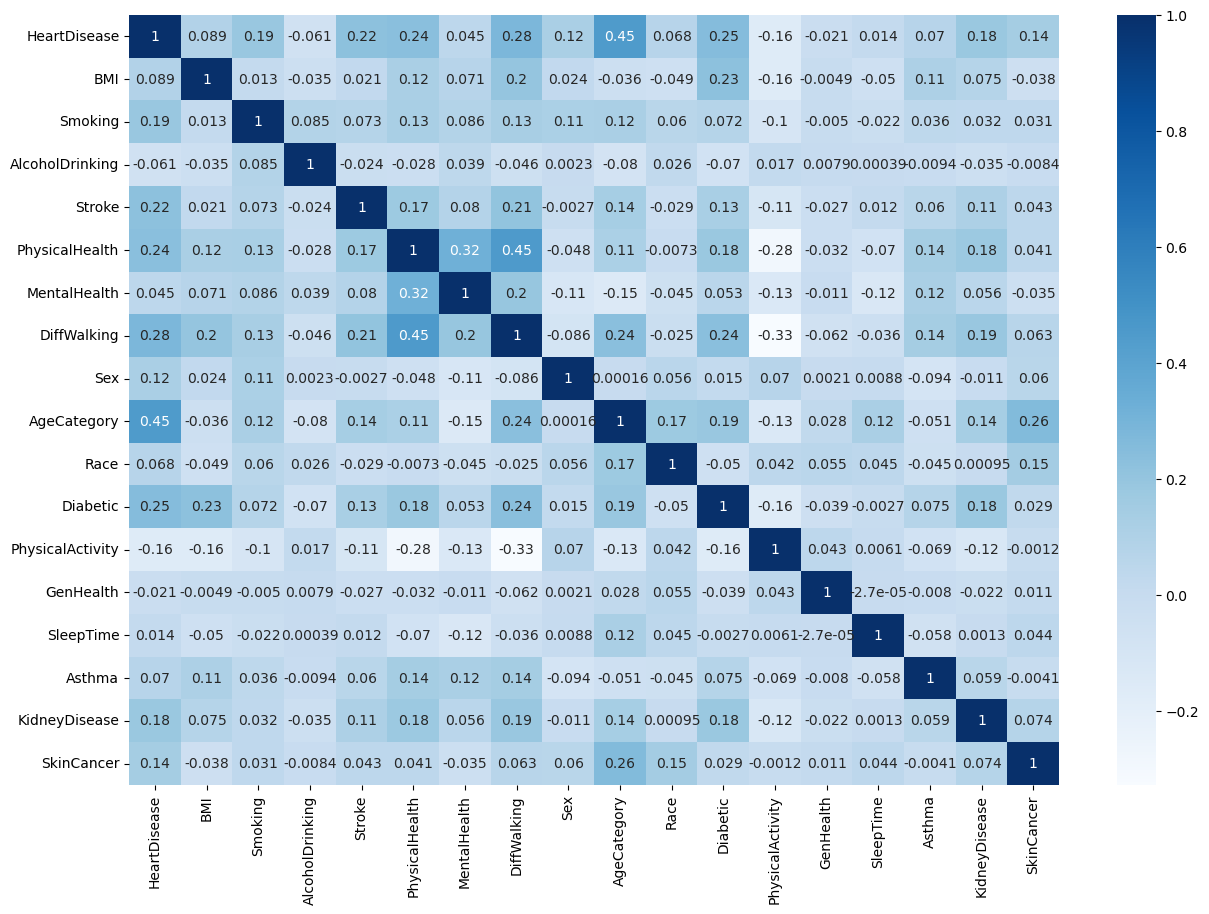

In [126]:
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()